In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt

data = xr.open_dataset("../AQ - Experiments/data/delhi_cpcb_2022.nc")
# data = xr.open_dataset("delhi_cpcb_2022.nc")
data

<xarray.Dataset>
Dimensions:    (station: 40, time: 8783)
Coordinates:
  * station    (station) object 'Alipur, Delhi - DPCC' ... 'Wazirpur, Delhi -...
  * time       (time) datetime64[ns] 2022-01-01T00:30:00 ... 2023-01-01T22:23:30
    latitude   (station) float64 ...
    longitude  (station) float64 ...
Data variables: (12/21)
    From Date  (station, time) datetime64[ns] ...
    To Date    (station, time) datetime64[ns] ...
    PM2.5      (station, time) float64 ...
    PM10       (station, time) float64 ...
    NO         (station, time) float64 ...
    NO2        (station, time) float64 ...
    ...         ...
    WD         (station, time) float64 ...
    SR         (station, time) float64 ...
    BP         (station, time) float64 ...
    AT         (station, time) float64 ...
    RF         (station, time) float64 ...
    TOT-RF     (station, time) float64 ...

In [2]:
df = data.to_dataframe()
# df = df["2022-01-01": "2022-12-31"]
df = data.to_dataframe().reset_index()
df = df[df["time"]=="2022-03-01 01:30:00"]
df = df.dropna(subset=["PM2.5"])
df = df.rename(columns={"RH": "relative_humidity", "WS": "wind_speed", "WD": "wind_direction", "SR": "solar_radiation", "BP": "pressure", "AT": "temperature", "RF": "rain_fall", "TOT-RF": "total_rainfall"})

In [3]:
df

,station,time,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,...,relative_humidity,wind_speed,wind_direction,solar_radiation,pressure,temperature,rain_fall,total_rainfall,latitude,longitude
1417,"Alipur, Delhi - DPCC",2022-03-01 01:30:00,2022-03-01 01:00:00,2022-03-01 02:00:00,70.00,150.00,3.78,43.38,26.15,3.42,...,78.22,NaN,139.97,4.55,993.40,11.43,0.0,0.0,28.815329,77.153010
10200,"Anand Vihar, Delhi - DPCC",2022-03-01 01:30:00,2022-03-01 01:00:00,2022-03-01 02:00:00,52.50,144.00,11.88,30.62,26.02,15.82,...,68.95,0.30,246.25,8.95,973.65,15.45,NaN,0.0,28.647622,77.315809
18983,"Ashok Vihar, Delhi - DPCC",2022-03-01 01:30:00,2022-03-01 01:00:00,2022-03-01 02:00:00,79.00,134.00,7.47,67.17,41.80,50.77,...,71.30,0.38,206.90,5.43,987.17,13.82,0.0,0.0,28.695381,77.181665
27766,"Aya Nagar, Delhi - IMD",2022-03-01 01:30:00,2022-03-01 01:00:00,2022-03-01 02:00:00,73.94,159.30,22.49,26.28,48.80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.470691,77.109936
36549,"Bawana, Delhi - DPCC",2022-03-01 01:30:00,2022-03-01 01:00:00,2022-03-01 02:00:00,135.00,245.00,4.80,20.65,25.43,41.45,...,81.62,0.62,22.33,5.70,993.12,12.30,0.0,0.0,28.776200,77.051074
45332,"Burari Crossing, Delhi - IMD",2022-03-01 01:30:00,2022-03-01 01:00:00,2022-03-01 02:00:00,52.81,158.79,NaN,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.725650,77.201157
54115,"CRRI Mathura Road, Delhi - IMD",2022-03-01 01:30:00,2022-03-01 01:00:00,2022-03-01 02:00:00,109.78,305.51,99.26,18.77,118.06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.551201,77.273574
62898,"Chandni Chowk, Delhi - IITM",2022-03-01 01:30:00,2022-03-01 01:00:00,2022-03-01 02:00:00,40.15,247.45,28.02,128.16,89.75,81.71,...,63.23,1.21,78.50,NaN,999.28,17.39,0.0,0.0,28.656756,77.227234
71681,"DTU, Delhi - CPCB",2022-03-01 01:30:00,2022-03-01 01:00:00,2022-03-01 02:00:00,79.83,145.75,7.80,24.82,19.45,23.85,...,77.85,0.45,130.91,NaN,NaN,NaN,NaN,0.0,28.750050,77.111261
80464,"Dr. Karni Singh Shooting Range, Delhi - DPCC",2022-03-01 01:30:00,2022-03-01 01:00:00,2022-03-01 02:00:00,78.50,218.75,73.85,95.58,111.05,14.77,...,72.95,0.88,294.10,5.20,988.48,11.15,0.0,0.0,28.498571,77.264840


In [4]:
latitudes = np.array(df['latitude'])
longitudes = np.array(df['longitude'])

g_lat = np.linspace(latitudes.min()-0.15, latitudes.max()+0.15, 10)
g_long = np.linspace(longitudes.min()-0.15, longitudes.max()+0.15, 10)

lat_grid, lon_grid = np.meshgrid(g_lat, g_long)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

train = df[['latitude', 'longitude', 'PM2.5']]

test = pd.DataFrame({'longitude':lon_grid.flatten(),
                     'latitude':lat_grid.flatten()})

In [6]:
X_train = train[['latitude', 'longitude']]
y_train = train['PM2.5']
X_test = test[['latitude', 'longitude']]

In [7]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [8]:
vals = model.predict(X_test)

In [9]:
test['PM2.5'] = vals

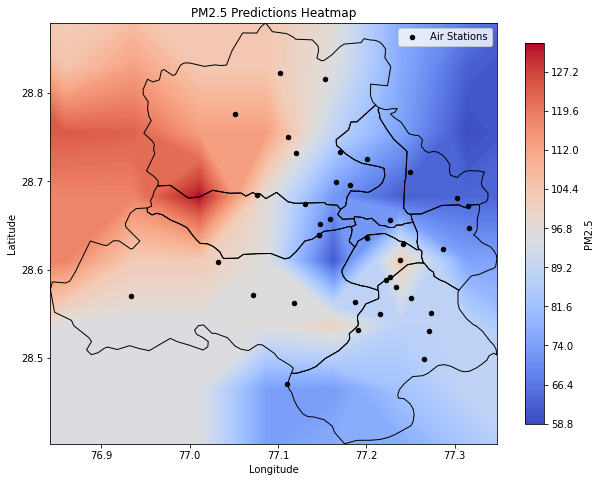

In [10]:
import heatmap
heatmap.plot_heatmap(lon = np.array(test['longitude']), lat = np.array(test['latitude']), values = test['PM2.5'].values)